In [1]:
import lazy_pipeline as lpipe
import numpy as np
import pandas as pd
import sklearn

In [2]:
test_df = pd.read_csv('diabetes.csv') 

In [3]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
test_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
test_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
test_size = 0.1
numerical_names = {'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'}

In [7]:
test_df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
new_data = dict()

In [10]:
new_data['Age21_29'] = (test_df['Age']<=29).astype(int)
new_data['Age30_40'] = ((test_df['Age']>29) & (test_df['Age']<=40)).astype(int)
new_data['Age41_81'] = (test_df['Age']>40).astype(int)

In [11]:
new_data['Pregnancies1_3'] = (test_df['Pregnancies']<=3).astype(int)
new_data['Pregnancies4_6'] = ((test_df['Pregnancies']>3) & (test_df['Pregnancies']<=6)).astype(int)
new_data['Pregnancies7_17'] = (test_df['Pregnancies']>6).astype(int)

In [12]:
new_data['Glucose0_100'] = (test_df['Glucose']<=100).astype(int)
new_data['Glucose101_140'] = ((test_df['Glucose']>100) & (test_df['Glucose']<=140)).astype(int)
new_data['Glucose141_199'] = (test_df['Glucose']>140).astype(int)

In [13]:
new_data['BloodPressure0_50'] = (test_df['BloodPressure']<=50).astype(int)
new_data['BloodPressure51_80'] = ((test_df['BloodPressure']>50) & (test_df['BloodPressure']<=80)).astype(int)
new_data['BloodPressure81_122'] = (test_df['BloodPressure']>80).astype(int)

In [14]:
new_data['SkinThickness0_20'] = (test_df['SkinThickness']<=20).astype(int)
new_data['SkinThickness21_35'] = ((test_df['SkinThickness']>20) & (test_df['SkinThickness']<=35)).astype(int)
new_data['SkinThickness36_99'] = (test_df['SkinThickness']>35).astype(int)

In [15]:
new_data['Insulin0_50'] = (test_df['Insulin']<=50).astype(int)
new_data['Insulin51_846'] = (test_df['Insulin']>50).astype(int)

In [16]:
new_data['BMI0_20'] = (test_df['BMI']<=20).astype(int)
new_data['BMI21_40'] = ((test_df['BMI']>20) & (test_df['BMI']<=40)).astype(int)
new_data['BMI41_67.1'] = (test_df['BMI']>40).astype(int)

In [17]:
new_data['DiabetesPedigreeFunction0.078_0.3'] = (test_df['DiabetesPedigreeFunction']<=0.3).astype(int)
new_data['DiabetesPedigreeFunction0.31_0.6'] = ((test_df['DiabetesPedigreeFunction']>0.3) & (test_df['DiabetesPedigreeFunction']<=0.6)).astype(int)
new_data['DiabetesPedigreeFunction0.61_2.42'] = (test_df['DiabetesPedigreeFunction']>0.6).astype(int)

In [18]:
new_data['Outcome'] = test_df['Outcome'].astype(bool)

In [19]:
df = pd.DataFrame(new_data)

In [20]:
df = df.sample(frac=1).reset_index(drop=True)

In [21]:
df

,Age21_29,Age30_40,Age41_81,Pregnancies1_3,Pregnancies4_6,Pregnancies7_17,Glucose0_100,Glucose101_140,Glucose141_199,BloodPressure0_50,...,SkinThickness36_99,Insulin0_50,Insulin51_846,BMI0_20,BMI21_40,BMI41_67.1,DiabetesPedigreeFunction0.078_0.3,DiabetesPedigreeFunction0.31_0.6,DiabetesPedigreeFunction0.61_2.42,Outcome
0,1,0,0,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,False
1,1,0,0,1,0,0,0,1,0,0,...,1,1,0,0,1,0,0,0,1,False
2,1,0,0,1,0,0,0,1,0,0,...,0,1,0,0,1,0,0,1,0,False
3,0,1,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,False
4,1,0,0,1,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,1,0,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,1,0,0,True
764,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,True
765,1,0,0,1,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,False
766,0,0,1,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,True


In [22]:
df = df.sample(frac=1).reset_index(drop=True)

In [23]:
y_name = 'Outcome'

In [24]:
y = df[y_name]
X = lpipe.binarize_X(df.drop(y_name, axis=1))
print(X.shape)
X.head()

(768, 46)


,Age21_29: 0,Age21_29: 1,Age30_40: 0,Age30_40: 1,Age41_81: 0,Age41_81: 1,Pregnancies1_3: 0,Pregnancies1_3: 1,Pregnancies4_6: 0,Pregnancies4_6: 1,...,BMI21_40: 0,BMI21_40: 1,BMI41_67.1: 0,BMI41_67.1: 1,DiabetesPedigreeFunction0.078_0.3: 0,DiabetesPedigreeFunction0.078_0.3: 1,DiabetesPedigreeFunction0.31_0.6: 0,DiabetesPedigreeFunction0.31_0.6: 1,DiabetesPedigreeFunction0.61_2.42: 0,DiabetesPedigreeFunction0.61_2.42: 1
0,False,True,True,False,True,False,False,True,True,False,...,False,True,True,False,True,False,True,False,False,True
1,False,True,True,False,True,False,False,True,True,False,...,False,True,True,False,True,False,True,False,False,True
2,True,False,True,False,False,True,True,False,True,False,...,False,True,True,False,True,False,False,True,True,False
3,False,True,True,False,True,False,False,True,True,False,...,False,True,True,False,True,False,False,True,True,False
4,True,False,True,False,False,True,True,False,False,True,...,False,True,True,False,False,True,True,False,True,False


In [25]:
X = X.sample(frac=1, random_state=42)  # Shuffle X
y = y[X.index]  # Order y to follow the order of rows from X

In [26]:
X

,Age21_29: 0,Age21_29: 1,Age30_40: 0,Age30_40: 1,Age41_81: 0,Age41_81: 1,Pregnancies1_3: 0,Pregnancies1_3: 1,Pregnancies4_6: 0,Pregnancies4_6: 1,...,BMI21_40: 0,BMI21_40: 1,BMI41_67.1: 0,BMI41_67.1: 1,DiabetesPedigreeFunction0.078_0.3: 0,DiabetesPedigreeFunction0.078_0.3: 1,DiabetesPedigreeFunction0.31_0.6: 0,DiabetesPedigreeFunction0.31_0.6: 1,DiabetesPedigreeFunction0.61_2.42: 0,DiabetesPedigreeFunction0.61_2.42: 1
668,False,True,True,False,True,False,False,True,True,False,...,True,False,False,True,False,True,True,False,True,False
324,False,True,True,False,True,False,True,False,False,True,...,False,True,True,False,False,True,True,False,True,False
624,False,True,True,False,True,False,False,True,True,False,...,False,True,True,False,False,True,True,False,True,False
690,False,True,True,False,True,False,False,True,True,False,...,False,True,True,False,True,False,True,False,False,True
473,False,True,True,False,True,False,False,True,True,False,...,False,True,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,True,False,False,True,True,False,False,True,True,False,...,False,True,True,False,False,True,True,False,True,False
106,False,True,True,False,True,False,False,True,True,False,...,False,True,True,False,False,True,True,False,True,False
270,True,False,False,True,True,False,True,False,False,True,...,False,True,True,False,True,False,False,True,True,False
435,True,False,False,True,True,False,True,False,True,False,...,False,True,True,False,True,False,True,False,False,True


In [27]:
y = y.values.tolist()

In [28]:
X_bin = [set(X.columns[x]) for idx, x in X.iterrows()]

In [29]:
n_train = int(len(X)*0.1)
n_test = len(X) - n_train
n_train, n_test

(76, 692)

In [30]:
y_test = y[n_train:]

In [31]:
%time
gen = lpipe.predict_array(X_bin, y, n_train, use_tqdm=True)
y_preds, t_preds = lpipe.apply_stopwatch(gen)

CPU times: total: 0 ns
Wall time: 0 ns


Predicting step by step: 100%|███████████████████████████████████████████████████████| 768/768 [00:30<00:00, 22.70it/s]


In [32]:
%%time
gen = list(lpipe.predict_array(X_bin, y, n_train, use_tqdm=True, update_train=False))
y_preds_fixedtrain, t_preds_fixedtrain = lpipe.apply_stopwatch(gen)

Predicting step by step: 100%|██████████████████████████████████████████████████████| 768/768 [00:00<00:00, 904.01it/s]

CPU times: total: 312 ms
Wall time: 767 ms


In [33]:
from sklearn.metrics import accuracy_score, f1_score

score_vals = {}
for score_f in [accuracy_score, f1_score]:
    score_name = score_f.__name__
    preds = y_preds
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]
    
    score_name = score_f.__name__ + '_fixedtrain'
    preds = y_preds_fixedtrain
    score_vals[score_name] = [score_f(y_test[:i], preds[:i]) for i in range(1, len(preds))]

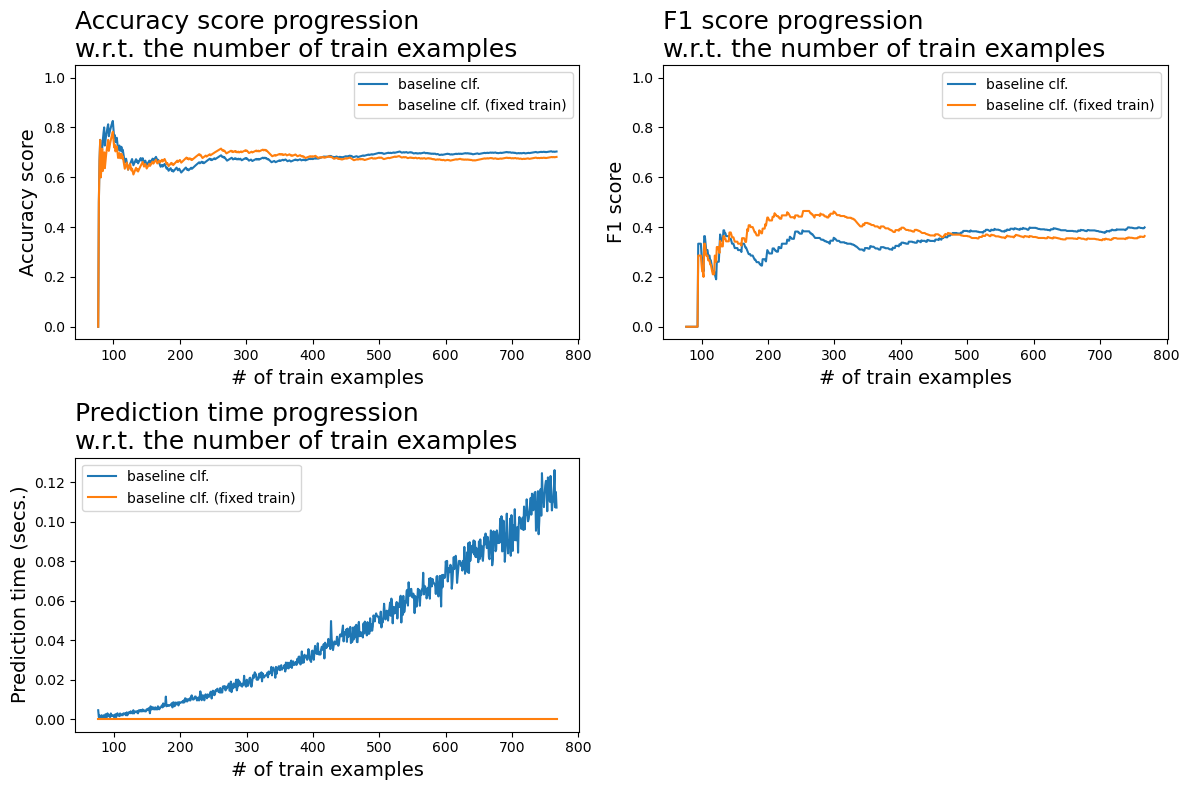

In [34]:
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = (1,1,1,1) 


fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for ax, t in zip(axs[0],['accuracy_score', 'f1_score']):
    ax.set_ylim(0-0.05, 1+0.05)
    ax.plot(range(n_train+1, len(X)), score_vals[t], label='baseline clf.')
    ax.plot(range(n_train+1, len(X)), score_vals[t+'_fixedtrain'], label='baseline clf. (fixed train)')
    
axs[1,0].plot(range(n_train, len(X)), t_preds, label='baseline clf.')
axs[1,0].plot(range(n_train, len(X)), t_preds_fixedtrain, label='baseline clf. (fixed train)')

for (ax, t_verb, dim) in zip(axs.flatten(), ['Accuracy score', 'F1 score', 'Prediction time'], ['','','(secs.)']):
    ax.set_title('\n'.join([f"{t_verb} progression", "w.r.t. the number of train examples"]), loc='left', size=18)
    ax.set_xlabel('# of train examples', size=14)
    ax.set_ylabel(f"{t_verb} {dim}".strip(), size=14)
    ax.legend()
    
axs[1,1].set_axis_off()    

plt.tight_layout()
plt.subplots_adjust()

plt.savefig('Classifier_comparison.png')
plt.show()

In [35]:
sum(score_vals['accuracy_score'])/len(score_vals['accuracy_score'])*100

68.22549289926081

In [36]:
sum(score_vals['f1_score'])/len(score_vals['f1_score'])*100

34.45908466492787

In [37]:
n_train = int(len(X)*0.9)
n_test = len(X) - n_train
X_train = X[:n_train]
X_test = X[n_train:]
y_train = y[:n_train]
y_test = y[n_train:]

In [53]:
from sklearn.ensemble import RandomForestClassifier

RF=RandomForestClassifier(n_estimators=100)
RF.fit(X_train,y_train)
y_pred=RF.predict(X_test)

from sklearn import metrics

acc =  metrics.accuracy_score(y_test, y_pred) * 100


In [54]:
acc

67.53246753246754

In [51]:
from sklearn import tree
from sklearn.metrics import accuracy_score
DF = tree.DecisionTreeClassifier(random_state=42)
DF = DF.fit(X_train, y_train)
y_pred = DF.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100


In [52]:
acc

63.63636363636363

In [45]:
from xgboost import XGBClassifier
xgb = XGBClassifier(booster='gbtree', learning_rate=0.1, max_depth=6)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100



In [46]:
acc

67.53246753246754

In [50]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
acc = accuracy_score(y_test, y_pred)*100


In [49]:
acc

67.53246753246754